# The choice of proposal in Metropolis algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
%config InlineBackend.figure_format='retina'

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

Here we will sample the $N$ dimensional distribution,

$$
f_\hat{x}(x)=Cexp(-\sum_{i=1}^N x_i^4 +\sum_{i=1}^{N-1}x_i x_{i+1}).
$$

This will be done in two ways:
- Each $x_i$ propsed uniformly from the interval $(x_i-1,x_i+1)$ 
- Only one $x_i$ is randomly chosen.

The task is to see, how the acceptance probability depends on the number of dimensions $N$.

## Each $x_i$ propsed uniformly from the interval $(x_i-1,x_i+1)$ 

In [44]:
def f(x,N):
    sum=0
    num=0
    for i in range(0,N):
      num+=x[i]**4
    for j in range (0,N-1):
      sum+=x[j]*x[j+1]
    res=-sum+num
    return res

In [45]:
def eachChange(i_state,N):
  count=0
  s=i_state
  q=s.copy()
  q=[q[j]+np.random.uniform(-1,1) for j in range(N)]
  d0=f(s,N)
  d1=f(q,N)
  d=d1-d0
  y=np.random.uniform()
  if y<min(1,np.exp(-d)):
    s=q
    count+=1
  return [s,count]

In [46]:
def mc(dist,s,N,runs):
  c=0
  for h in range(runs):
    s=dist(s,N)[0]
    c=c+dist(s,N)[1]
  p=c/runs
  sigma=np.sqrt(p*(1-p)/runs)
  return [p,sigma]

In [54]:
lst=[0,1,2,3,4,5,6,7,8,9,10,20,30,40,50]
yt=[]
yt_sigma=[]
for t in lst:
    s=[np.random.uniform(-1,1) for k in range(t)]
    yt.append(mc(eachChange,s,t,10**4)[0])
    yt_sigma.append(mc(eachChange,s,t,10**4)[1])

In [55]:
def func(x, a, b, c):
    return a*np.exp(-b * x)+c 

In [56]:
fit1,_=curve_fit(func,lst,yt)
np.around(fit1,3)

array([0.963, 0.276, 0.014])

In [57]:
df3=pd.DataFrame(list(zip(lst,np.around(yt,3),np.around(yt_sigma,3))),columns=['N','Av. probability','sigma'])
df3['Fitted value']=np.around([fit1[0]*np.exp(-fit1[1]*n)+ fit1[2] for n in df3['N']],3)
df3['Error']=df3['Av. probability']-df3['Fitted value']

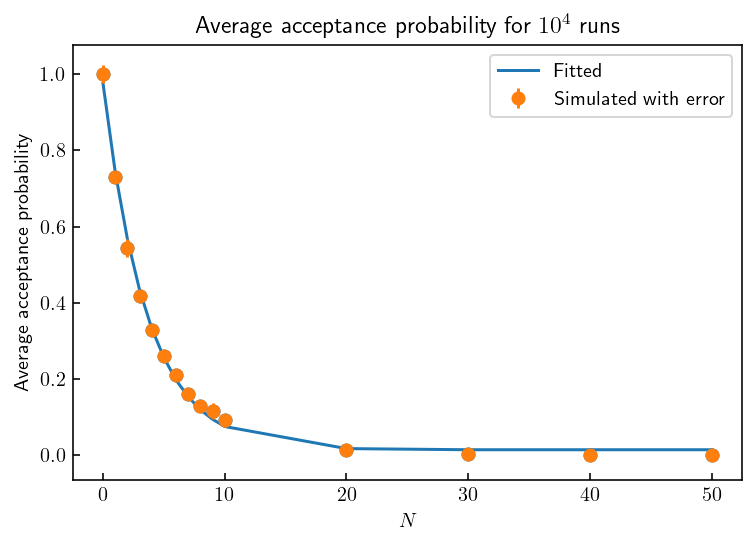

In [61]:
plt.plot(df3['N'],df3['Fitted value'],label='Fitted')
plt.scatter(df3['N'],df3['Av. probability'])
plt.errorbar(df3['N'],df3['Av. probability'],yerr=df3['Error'],fmt='o',label='Simulated with error')
plt.title('Average acceptance probability for $10^4$ runs')
plt.xlabel('$N$')
plt.ylabel('Average acceptance probability')
plt.legend()

Note that the acceptance probability falls exponentially as the number of dimesnions is increased.

## Only one $x_i$ is randomly chosen

In [62]:
def oneChange(i_state,N):
  count=0
  s=i_state
  q=s.copy()
  q[np.random.randint(0,N)]=q[np.random.randint(0,N)]+np.random.uniform(-1,1)
  d0=f(s,N)
  d1=f(q,N)
  d=d1-d0
  y=np.random.uniform()
  if y<min(1,np.exp(-d)):
    s=q
    count+=1
  return [s,count]

In [63]:
lst=[1,2,3,4,5,6,7,8,9,10,20,30,40,50]
y4=[]
y4_sigma=[]
for t in lst:
    s=[np.random.uniform(-1,1) for k in range(t)]
    y4.append(mc(oneChange,s,t,10**4)[0])
    y4_sigma.append(mc(oneChange,s,t,10**4)[1])

In [64]:
def func1(x, m, c):
    return m *x +c 

In [38]:
fit2,_ = curve_fit(func1,lst,y4)
np.around(fit2,3)

array([-0.001,  0.705])

In [65]:
df4=pd.DataFrame(list(zip(lst,np.around(y4,3),np.around(y4_sigma,3))),columns=['N','Av. probability','sigma'])
df4['Fitted value']=np.around([fit2[0]*n+ fit2[1] for n in df4['N']],3)
df4['Error']=df4['Av. probability']-df4['Fitted value']

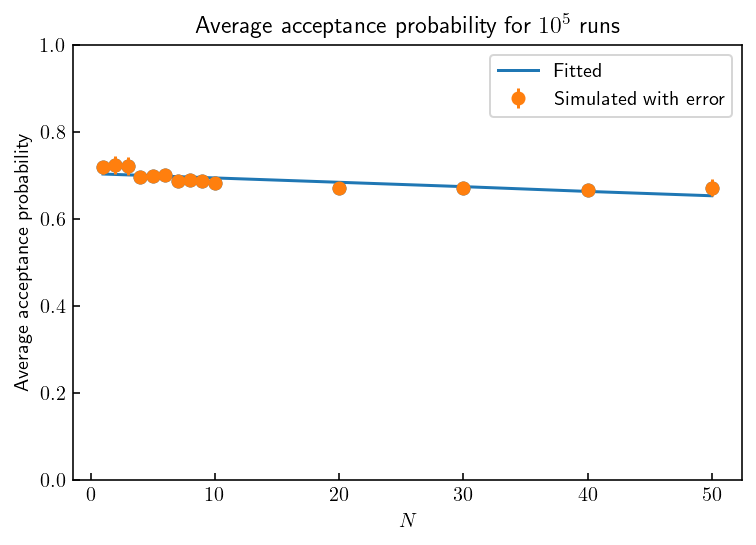

In [66]:
plt.plot(df4['N'],df4['Fitted value'],label='Fitted')
plt.scatter(df4['N'],df4['Av. probability'])
plt.errorbar(df4['N'],df4['Av. probability'],yerr=df4['Error'],fmt='o',label='Simulated with error')
plt.title('Average acceptance probability for $10^5$ runs')
plt.xlabel('$N$')
plt.ylabel('Average acceptance probability')
plt.ylim(0,1)
plt.legend()

For this case the acceptance probability stays around a constant value.

***